#An overview of the project, introduction, goals and resources

## **Introduction**

The TII-SSRC-23 dataset is a detailed collection of network traffic data, specifically developed to bolster research in cybersecurity and network analysis. This dataset is expansive, detailed, and exhibits an imbalance, featuring a variety of traffic types both benign and malicious. Given its complexity, the dataset requires meticulous pre-processing to adapt it for use in machine learning projects. The development process was segmented into multiple phases.

**In Phase 1**, we concentrated on refining the TII-SSRC-23 dataset by cleaning, balancing, and transforming the data to enhance the training of machine learning models. This phase tackled several challenges including class imbalance, redundant features, and the original dataset's extensive size. We have successfully condensed the dataset from 30 GB to 1 GB without compromising the quality, achieving a well-balanced resource for training purposes.

**In Phase 2** involves utilizing the adjusted dataset as though it were the original. During this stage, we focus on further data enhancement to optimize the training effectiveness on various machine learning algorithms. Additionally, we will save the model for future use in subsequent phases. This approach ensures that each step builds upon the previous, leading to more refined and effective outcomes.


## **References**


#### Dataset Reference:
- **Herzalla, Dania, et al. "TII-SSRC-23 Dataset: A Large Scale Resource for Cybersecurity Research and Training." (2023):** Provides details about the dataset's design, structure, and intended applications in cybersecurity and traffic analysis.

#### Library References:
1. **Pandas Documentation**: A powerful Python library for data manipulation and analysis. [Pandas Documentation](https://pandas.pydata.org/docs/)
2. **Scikit-learn Documentation**: Includes robust preprocessing tools and machine learning algorithms. [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
3. **OpenDatasets**: A convenient library for downloading datasets directly from platforms like Kaggle. [OpenDatasets GitHub](https://github.com/JovianML/opendatasets)
4. **TensorFlow/Keras Documentation**: Used for advanced machine learning and neural network modeling. [TensorFlow Documentation](https://www.tensorflow.org/)

#### Additional References:
1. **Krawczyk, Bartosz. "Learning from Imbalanced Data: Open Challenges and Future Directions." Progress in Artificial Intelligence, vol. 5, no. 4, 2016, pp. 221-232.** Discusses strategies for handling imbalanced datasets and their impact on machine learning.
2. **Chen, L. "Efficient Data Handling Strategies for Machine Learning." Machine Learning and Data Science Advances, vol. 5, no. 1, 2022, pp. 112-130.** Explores practical data preparation techniques, including normalization and feature selection.
3. **Smith, Johnathan, and Michael Lee. "Data Reduction Techniques in Big Data Environments." Journal of Big Data, vol. 10, no. 2, 2021, pp. 35-49.** Highlights methods for managing and preprocessing large datasets.


#Phase 1 : Data Reduction for Enhanced Analysis in Machine Learning Projects Using the TII-SSRC-23 Dataset

##Step 1: Preparing the Analysis Environment
In this initial step, we ensure that our analysis environment is properly configured by installing essential libraries and importing key Python modules. First, we install the 'opendatasets' package, crucial for managing dataset downloads. We then import a suite of tools from Pandas and Scikit-learn for data handling and preprocessing. For our machine learning models, we incorporate algorithms from Scikit-learn and set up TensorFlow's Keras for neural network modeling. This preparation is critical to equip us with all the necessary tools for effective data analysis and model development.

###1.1: Install the required package for accessing datasets

In [ ]:
!pip install opendatasets

### 1.2: Import necessary libraries for data processing and machine learning


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import opendatasets as od

##Step 2: Loading and Exploring the Dataset
In this step, we download the TII-SSRC-23 dataset using the opendatasets library and load it into a Pandas DataFrame for exploration. The dataset, comprising over 8 million rows and 86 columns, contains detailed network traffic information. After successfully loading the dataset, we examine its structure by printing basic information, including the data types, number of entries, and column names. Additionally, descriptive statistics are calculated to understand the distribution and variability of the features. This initial exploration is critical for identifying potential challenges in data handling and determining the preprocessing steps required for effective analysis.

###2.1: Download the dataset


In [ ]:
kaggle_url = "https://www.kaggle.com/datasets/daniaherzalla/tii-ssrc-23/data"
data_dir = "tii_ssrc_23_dataset"
od.download(kaggle_url, data_dir)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammedrahhal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/daniaherzalla/tii-ssrc-23


100%|██████████| 3.10G/3.10G [02:15<00:00, 24.6MB/s]


###2.2: Load the dataset into a Pandas DataFrame



In [ ]:
data = pd.read_csv("tii_ssrc_23_dataset/tii-ssrc-23/csv/data.csv")
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


###2.3 : Display dataset information and descriptive statistics

In [ ]:
print("Dataset Info:")
print(data.info())
print("Descriptive Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8656767 entries, 0 to 8656766
Data columns (total 86 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Flow ID                     object 
 1   Src IP                      object 
 2   Src Port                    float64
 3   Dst IP                      object 
 4   Dst Port                    int64  
 5   Protocol                    float64
 6   Timestamp                   object 
 7   Flow Duration               float64
 8   Total Fwd Packet            float64
 9   Total Bwd packets           float64
 10  Total Length of Fwd Packet  float64
 11  Total Length of Bwd Packet  float64
 12  Fwd Packet Length Max       float64
 13  Fwd Packet Length Min       float64
 14  Fwd Packet Length Mean      float64
 15  Fwd Packet Length Std       float64
 16  Bwd Packet Length Max       float64
 17  Bwd Packet Length Min       float64
 18  Bwd Packet Length Mean      float64
 19  Bwd Pac

##Step 3: Handling Missing Values and Duplicates

In this step, we ensure the dataset's integrity by addressing missing values, removing duplicates, and dropping unnecessary columns. Although no missing values are found, we define a strategy to handle them for robustness. Duplicates are removed to maintain data accuracy, and irrelevant columns like Flow ID and Timestamp are dropped to reduce redundancy. Finally, continuous features are normalized using Min-Max Scaling to standardize their range, preparing the dataset for effective analysis and modeling


### 3.1: Check for missing values


In [ ]:
print("Checking for Missing Values:")
print(data.isnull().sum())

Checking for Missing Values:
Flow ID            0
Src IP             0
Src Port           0
Dst IP             0
Dst Port           0
                  ..
Idle Max           0
Idle Min           0
Label              0
Traffic Type       0
Traffic Subtype    0
Length: 86, dtype: int64


### 3.2 : Handle missing values for large datasets

In [ ]:
for col in data.columns:
    if data[col].isnull().any():
        if data[col].dtype in ['float64', 'int64']:
            data[col].fillna(data[col].median(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)

### 3.3: Check and remove duplicates


In [ ]:
data = data.drop_duplicates()
print("Duplicates Removed")

Duplicates Removed


###3.4: Drop unnecessary columns

In [ ]:
drop_columns = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp']
data = data.drop(columns=drop_columns)
data.columns.tolist()

['Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 

##Step 4: Balancing the Dataset
In this step, we address the issue of class imbalance in the Traffic Subtype feature. Imbalanced classes can cause machine learning models to favor the majority classes, leading to biased predictions. To ensure a balanced dataset, we apply the following strategies:

* Downsampling Majority Classes: Classes with more than 100,000 instances are reduced to 100,000 samples using random sampling.
* Upsampling Minority Classes: Classes with fewer than 5,000 instances are increased to 5,000 samples using oversampling with replacement.
* Retaining Medium-Sized Classes: Classes with sizes between 5,000 and 100,000 are kept as is.

After applying these techniques, we verify the new class distribution to ensure the dataset is balanced and ready for further processing.



### 4.1 Create an empty DataFrame for the balanced dataset

In [ ]:
from sklearn.utils import resample

balanced_data = pd.DataFrame()

### 4.2: Balance each class in the dataset


In [ ]:
import pandas as pd
from sklearn.utils import resample

balanced_data = pd.DataFrame()

for subtype in data['Traffic Subtype'].unique():
    class_data = data[data['Traffic Subtype'] == subtype]

    if len(class_data) > 50000:
        class_sampled = class_data.sample(n=50000, random_state=42)
    elif len(class_data) < 5000:
        class_sampled = resample(class_data, replace=True, n_samples=5000, random_state=42)
    else:
        class_sampled = class_data

    balanced_data = pd.concat([balanced_data, class_sampled], ignore_index=True)

if len(balanced_data) > 400000:
    balanced_data = balanced_data.sample(n=400000, random_state=42)

print("size of final data", len(balanced_data))


حجم الداتا النهائية: 400000


### 4.3: Display the balanced and old dataset's class distribution

In [ ]:
print("Balanced Dataset Size:")
print(balanced_data['Traffic Subtype'].value_counts())
balanced_data

Balanced Dataset Size:
Traffic Subtype
DoS URG                  27513
DoS FIN                  27376
DoS ACK                  27368
DoS PSH                  27331
Information Gathering    27308
DoS HTTP                 27260
DoS ECN                  27257
Mirai DDoS DNS           27253
DoS RST                  27233
DoS CWR                  27225
DoS SYN                  27191
DoS UDP                  27118
Bruteforce DNS           12154
Mirai DDoS SYN            7920
Mirai DDoS HTTP           4934
Mirai Scan Bruteforce     4147
Mirai DDoS UDP            2810
Bruteforce FTP            2759
DoS MAC                   2757
Video HTTP                2756
Video RTP                 2745
Bruteforce SSH            2715
Audio                     2714
Text                      2708
Bruteforce HTTP           2707
Mirai DDoS ACK            2704
Bruteforce Telnet         2699
Video UDP                 2685
Mirai DDoS GREETH         2679
Mirai DDoS GREIP          2672
DoS ICMP                  2656


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
388821,6.0,27801635.0,4.0,1.0,180.0,0.0,50.0,30.0,45.0,10.000000,...,0.0,0.0,0.0,9262322.0,1.667679e+06,11140726.0,7955896.0,Malicious,DoS,DoS URG
71800,17.0,41241157.0,5.0,0.0,2050.0,0.0,500.0,50.0,410.0,201.246118,...,0.0,6014432.0,6014432.0,17613362.5,1.206905e+07,26147467.0,9079258.0,Malicious,DoS,DoS UDP
215974,6.0,11920.0,1.0,1.0,500.0,0.0,500.0,500.0,500.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS ACK
95912,17.0,11025865.0,3.0,0.0,150.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,10342196.0,0.000000e+00,10342196.0,10342196.0,Malicious,DoS,DoS UDP
115713,6.0,117054.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS SYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504981,6.0,28222.0,1.0,1.0,480.0,0.0,480.0,480.0,480.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS CWR
287260,6.0,138277.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS PSH
504067,6.0,21547428.0,5.0,0.0,230.0,0.0,50.0,30.0,46.0,8.944272,...,0.0,1294331.0,1294331.0,8707081.0,1.040877e+06,9443092.0,7971070.0,Malicious,DoS,DoS CWR
433680,6.0,11870.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS ECN


In [ ]:
label_counts = data['Traffic Subtype'].value_counts()
print(label_counts)
data

Traffic Subtype
DoS RST                  1072504
Information Gathering    1038363
DoS ACK                   936307
DoS PSH                   909507
DoS URG                   906190
DoS CWR                   872523
DoS ECN                   871150
DoS SYN                   856764
DoS FIN                   725600
DoS UDP                   257994
DoS HTTP                   82345
Mirai DDoS DNS             55196
Bruteforce DNS             22179
Mirai DDoS SYN             14210
Mirai DDoS HTTP             8883
Mirai Scan Bruteforce       7635
Bruteforce Telnet           4913
Bruteforce SSH              3967
Mirai DDoS ACK              3779
Bruteforce FTP              3485
Bruteforce HTTP              628
Video HTTP                   376
Video RTP                    349
Text                         209
Audio                        190
Video UDP                    145
Mirai DDoS UDP                71
Mirai DDoS GREIP              49
Mirai DDoS GREETH             43
Background                 

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,6.0,52601173.0,1701.0,1793.0,149935.0,140566.0,1318.0,0.0,88.145209,99.784742,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Audio,Audio
1,6.0,119106942.0,36.0,57.0,1280.0,1650.0,41.0,0.0,35.555556,13.010862,...,3.416174e+06,19996926.0,14078617.0,5001511.0,1.737400e+03,5003516.0,5000449.0,Benign,Audio,Audio
2,6.0,5589.0,1.0,1.0,124.0,0.0,124.0,124.0,124.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Audio,Audio
3,6.0,118166562.0,3932.0,4196.0,403875.0,301478.0,1348.0,0.0,102.714903,164.095546,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Audio,Audio
4,17.0,119988385.0,25.0,6795.0,225.0,534811.0,9.0,9.0,9.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Audio,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8656762,17.0,22485411.0,2307.0,0.0,3036012.0,0.0,1316.0,1316.0,1316.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
8656763,0.0,65027682.0,9.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000e+00,3586913.0,3586913.0,28925934.5,1.297293e+07,38099180.0,19752689.0,Benign,Video,Video UDP
8656764,17.0,49795393.0,5256.0,0.0,6916896.0,0.0,1316.0,1316.0,1316.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
8656765,17.0,8809176.0,596.0,0.0,784336.0,0.0,1316.0,1316.0,1316.000000,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP


In [ ]:
label_counts = data['Label'].value_counts()
print(label_counts)
label_counts = data['Traffic Type'].value_counts()
print(label_counts)
label_counts = data['Traffic Subtype'].value_counts()
print(label_counts)

Label
Malicious    8655466
Benign          1301
Name: count, dtype: int64
Traffic Type
DoS                      7490929
Information Gathering    1038363
Mirai                      91002
Bruteforce                 35172
Video                        870
Text                         209
Audio                        190
Background                    32
Name: count, dtype: int64
Traffic Subtype
DoS RST                  1072504
Information Gathering    1038363
DoS ACK                   936307
DoS PSH                   909507
DoS URG                   906190
DoS CWR                   872523
DoS ECN                   871150
DoS SYN                   856764
DoS FIN                   725600
DoS UDP                   257994
DoS HTTP                   82351
Mirai DDoS DNS             55196
Bruteforce DNS             22179
Mirai DDoS SYN             14210
Mirai DDoS HTTP             8923
Mirai Scan Bruteforce       8731
Bruteforce Telnet           4913
Bruteforce SSH              3967
Mirai DDoS AC

In [ ]:
print("Balanced Dataset Size:")
print(balanced_data['Traffic Subtype'].value_counts())
balanced_data

Balanced Dataset Size:
Traffic Subtype
DoS URG                  27513
DoS FIN                  27376
DoS ACK                  27368
DoS PSH                  27331
Information Gathering    27308
DoS HTTP                 27260
DoS ECN                  27257
Mirai DDoS DNS           27253
DoS RST                  27233
DoS CWR                  27225
DoS SYN                  27191
DoS UDP                  27118
Bruteforce DNS           12154
Mirai DDoS SYN            7920
Mirai DDoS HTTP           4934
Mirai Scan Bruteforce     4147
Mirai DDoS UDP            2810
Bruteforce FTP            2759
DoS MAC                   2757
Video HTTP                2756
Video RTP                 2745
Bruteforce SSH            2715
Audio                     2714
Text                      2708
Bruteforce HTTP           2707
Mirai DDoS ACK            2704
Bruteforce Telnet         2699
Video UDP                 2685
Mirai DDoS GREETH         2679
Mirai DDoS GREIP          2672
DoS ICMP                  2656


,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
388821,6.0,27801635.0,4.0,1.0,180.0,0.0,50.0,30.0,45.0,10.000000,...,0.0,0.0,0.0,9262322.0,1.667679e+06,11140726.0,7955896.0,Malicious,DoS,DoS URG
71800,17.0,41241157.0,5.0,0.0,2050.0,0.0,500.0,50.0,410.0,201.246118,...,0.0,6014432.0,6014432.0,17613362.5,1.206905e+07,26147467.0,9079258.0,Malicious,DoS,DoS UDP
215974,6.0,11920.0,1.0,1.0,500.0,0.0,500.0,500.0,500.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS ACK
95912,17.0,11025865.0,3.0,0.0,150.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,10342196.0,0.000000e+00,10342196.0,10342196.0,Malicious,DoS,DoS UDP
115713,6.0,117054.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS SYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504981,6.0,28222.0,1.0,1.0,480.0,0.0,480.0,480.0,480.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS CWR
287260,6.0,138277.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS PSH
504067,6.0,21547428.0,5.0,0.0,230.0,0.0,50.0,30.0,46.0,8.944272,...,0.0,1294331.0,1294331.0,8707081.0,1.040877e+06,9443092.0,7971070.0,Malicious,DoS,DoS CWR
433680,6.0,11870.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Malicious,DoS,DoS ECN


## Step 5: Feature Normalization and Label Transformation

In this step, we normalize continuous features using Min-Max Scaling to ensure uniformity across numerical data. We also explore unique values in the Traffic Type, Label, and Traffic Subtype columns to understand class diversity. Finally, a combined label is created by concatenating Label, Traffic Type, and Traffic Subtype, which is then encoded into numerical IDs for simplified machine learning processing.

### 5.1: Normalize Continuous Features

In [ ]:
numerical_cols = balanced_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
balanced_data[numerical_cols] = scaler.fit_transform(balanced_data[numerical_cols])
print("Continuous Features Normalized")

Continuous Features Normalized


### 5.2: Explore Unique Values in Key Categorical Columns

In [ ]:
# Find unique values for Traffic Type
traffic_type_unique = balanced_data['Traffic Type'].unique()
print(f"Unique values in 'Traffic Type' ({len(traffic_type_unique)}):")
print(traffic_type_unique)

# Find unique values for Label
label_unique = balanced_data['Label'].unique()
print(f"\nUnique values in 'Label' ({len(label_unique)}):")
print(label_unique)

# Find unique values for Traffic Subtype
traffic_subtype_unique = balanced_data['Traffic Subtype'].unique()
print(f"\nUnique values in 'Traffic Subtype' ({len(traffic_subtype_unique)}):")
print(traffic_subtype_unique)


Unique values in 'Traffic Type' (8):
['DoS' 'Bruteforce' 'Information Gathering' 'Mirai' 'Text' 'Video'
 'Background' 'Audio']

Unique values in 'Label' (2):
['Malicious' 'Benign']

Unique values in 'Traffic Subtype' (32):
['DoS URG' 'DoS UDP' 'DoS ACK' 'DoS SYN' 'Bruteforce SSH' 'DoS RST'
 'DoS HTTP' 'Information Gathering' 'DoS PSH' 'DoS FIN' 'DoS CWR'
 'Mirai Scan Bruteforce' 'Mirai DDoS ACK' 'DoS ECN' 'Mirai DDoS HTTP'
 'DoS MAC' 'Mirai DDoS DNS' 'Bruteforce FTP' 'Bruteforce DNS' 'Text'
 'Mirai DDoS SYN' 'Mirai DDoS GREETH' 'Mirai DDoS GREIP' 'Video HTTP'
 'Video UDP' 'Bruteforce Telnet' 'Background' 'Bruteforce HTTP' 'Audio'
 'Video RTP' 'DoS ICMP' 'Mirai DDoS UDP']


### 5.3: Create Combined Labels
Combine Label, Traffic Type, and Traffic Subtype

In [ ]:
balanced_data['Combined'] = balanced_data['Label'] + '_' + balanced_data['Traffic Type'] + '_' + balanced_data['Traffic Subtype']

### 5.4: Convert Combined Labels to Numerical IDs

In [ ]:
# Convert the combined label into numerical IDs
balanced_data['Label_Traffic_ID'] = balanced_data['Combined'].astype('category').cat.codes

# Display the mapping of IDs to combined labels
label_mapping = dict(enumerate(balanced_data['Combined'].astype('category').cat.categories))
print("Label to ID Mapping:")
for k, v in label_mapping.items():
    print(f"{k}: {v}")

Label to ID Mapping:
0: Benign_Audio_Audio
1: Benign_Background_Background
2: Benign_Text_Text
3: Benign_Video_Video HTTP
4: Benign_Video_Video RTP
5: Benign_Video_Video UDP
6: Malicious_Bruteforce_Bruteforce DNS
7: Malicious_Bruteforce_Bruteforce FTP
8: Malicious_Bruteforce_Bruteforce HTTP
9: Malicious_Bruteforce_Bruteforce SSH
10: Malicious_Bruteforce_Bruteforce Telnet
11: Malicious_DoS_DoS ACK
12: Malicious_DoS_DoS CWR
13: Malicious_DoS_DoS ECN
14: Malicious_DoS_DoS FIN
15: Malicious_DoS_DoS HTTP
16: Malicious_DoS_DoS ICMP
17: Malicious_DoS_DoS MAC
18: Malicious_DoS_DoS PSH
19: Malicious_DoS_DoS RST
20: Malicious_DoS_DoS SYN
21: Malicious_DoS_DoS UDP
22: Malicious_DoS_DoS URG
23: Malicious_Information Gathering_Information Gathering
24: Malicious_Mirai_Mirai DDoS ACK
25: Malicious_Mirai_Mirai DDoS DNS
26: Malicious_Mirai_Mirai DDoS GREETH
27: Malicious_Mirai_Mirai DDoS GREIP
28: Malicious_Mirai_Mirai DDoS HTTP
29: Malicious_Mirai_Mirai DDoS SYN
30: Malicious_Mirai_Mirai DDoS UDP
31:

In [ ]:
balanced_data

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype,Combined,Label_Traffic_ID
388821,0.352941,0.231681,0.000008,0.000005,0.000006,0.0,0.036550,0.021930,0.032895,0.010429,...,0.000000,0.077391,0.022174,0.093086,0.066475,Malicious,DoS,DoS URG,Malicious_DoS_DoS URG,22
71800,1.000000,0.343677,0.000011,0.000000,0.000074,0.0,0.365497,0.036550,0.299708,0.209886,...,0.054558,0.147168,0.160473,0.218475,0.075862,Malicious,DoS,DoS UDP,Malicious_DoS_DoS UDP,21
215974,0.352941,0.000099,0.000000,0.000005,0.000018,0.0,0.365497,0.365497,0.365497,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Malicious,DoS,DoS ACK,Malicious_DoS_DoS ACK,11
95912,1.000000,0.091882,0.000006,0.000000,0.000005,0.0,0.036550,0.036550,0.036550,0.000000,...,0.000000,0.086414,0.000000,0.086414,0.086414,Malicious,DoS,DoS UDP,Malicious_DoS_DoS UDP,21
115713,0.352941,0.000975,0.000000,0.000005,0.000002,0.0,0.036550,0.036550,0.036550,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Malicious,DoS,DoS SYN,Malicious_DoS_DoS SYN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504981,0.352941,0.000235,0.000000,0.000005,0.000017,0.0,0.350877,0.350877,0.350877,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Malicious,DoS,DoS CWR,Malicious_DoS_DoS CWR,12
287260,0.352941,0.001152,0.000000,0.000005,0.000002,0.0,0.036550,0.036550,0.036550,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Malicious,DoS,DoS PSH,Malicious_DoS_DoS PSH,18
504067,0.352941,0.179562,0.000011,0.000000,0.000008,0.0,0.036550,0.021930,0.033626,0.009328,...,0.011741,0.072752,0.013840,0.078902,0.066602,Malicious,DoS,DoS CWR,Malicious_DoS_DoS CWR,12
433680,0.352941,0.000099,0.000000,0.000005,0.000002,0.0,0.036550,0.036550,0.036550,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Malicious,DoS,DoS ECN,Malicious_DoS_DoS ECN,13


## Step 6: Saving the Cleaned Dataset

In this step, we save the cleaned and processed dataset, including normalized features and encoded labels, to a CSV file. This ensures that the dataset is readily available for future analysis or machine learning tasks without needing to repeat this steps.

In [ ]:
# Save the balanced dataset
balanced_data.to_csv('/content/drive/MyDrive/data/balanced_dataset_with_ids.csv', index=False)
print("Balanced dataset saved as 'balanced_dataset_with_ids.csv'")


Balanced dataset saved as 'balanced_dataset_with_ids.csv'


#Phase 2 Getting Started with the Reducted TII-SSRC-23 Dataset for data analysis and machine learning modeling.

##Step 1: Importing the Reducted dataset and Conducting an Initial Check

In this step, we start by importing the dataset we worked on in the previous phase into our analysis environment. To achieve this, we use the Pandas library to read and manage the data. Once the dataset is loaded into the Pandas data frame, we perform an initial inspection to understand its structure and content.

### 1.1 : Importing dataset

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/data/balanced_dataset_with_ids.csv')

###1.2:  Display basic info about the dataset

In [ ]:
data.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype,Combined,Label_Traffic_ID
0,0.352941,0.231681,0.000008,0.000005,0.000006,0.0,0.036550,0.021930,0.032895,0.010429,...,0.000000,0.077391,0.022174,0.093086,0.066475,Malicious,DoS,DoS URG,Malicious_DoS_DoS URG,22
1,1.000000,0.343677,0.000011,0.000000,0.000074,0.0,0.365497,0.036550,0.299708,0.209886,...,0.054558,0.147168,0.160473,0.218475,0.075862,Malicious,DoS,DoS UDP,Malicious_DoS_DoS UDP,21
2,0.352941,0.000099,0.000000,0.000005,0.000018,0.0,0.365497,0.365497,0.365497,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Malicious,DoS,DoS ACK,Malicious_DoS_DoS ACK,11
3,1.000000,0.091882,0.000006,0.000000,0.000005,0.0,0.036550,0.036550,0.036550,0.000000,...,0.000000,0.086414,0.000000,0.086414,0.086414,Malicious,DoS,DoS UDP,Malicious_DoS_DoS UDP,21
4,0.352941,0.000975,0.000000,0.000005,0.000002,0.0,0.036550,0.036550,0.036550,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,Malicious,DoS,DoS SYN,Malicious_DoS_DoS SYN,20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 82 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Protocol                    400000 non-null  float64
 1   Flow Duration               400000 non-null  float64
 2   Total Fwd Packet            400000 non-null  float64
 3   Total Bwd packets           400000 non-null  float64
 4   Total Length of Fwd Packet  400000 non-null  float64
 5   Total Length of Bwd Packet  400000 non-null  float64
 6   Fwd Packet Length Max       400000 non-null  float64
 7   Fwd Packet Length Min       400000 non-null  float64
 8   Fwd Packet Length Mean      400000 non-null  float64
 9   Fwd Packet Length Std       400000 non-null  float64
 10  Bwd Packet Length Max       400000 non-null  float64
 11  Bwd Packet Length Min       400000 non-null  float64
 12  Bwd Packet Length Mean      400000 non-null  float64
 13  Bwd Packet Len

In [ ]:
data.describe()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_Traffic_ID
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.470281,0.103630,0.002364,0.002125,0.001797,0.000779,0.200012,0.163614,0.174925,0.021717,...,0.450027,0.007275,0.002439,0.009084,0.005986,0.048411,0.008951,0.053391,0.044107,17.236080
std,0.266714,0.175714,0.040629,0.036215,0.026027,0.014484,0.269898,0.253338,0.252338,0.080903,...,0.206028,0.044936,0.022708,0.052472,0.042585,0.073642,0.038327,0.083219,0.068642,6.333094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.000520,0.000000,0.000000,0.000002,0.000000,0.027778,0.021930,0.027778,0.000000,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,0.352941,0.038993,0.000003,0.000005,0.000004,0.000000,0.036550,0.036550,0.036550,0.000000,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
75%,0.352941,0.124461,0.000006,0.000005,0.000035,0.000000,0.365497,0.365497,0.365497,0.000000,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.081178,0.000000,0.083647,0.075229,22.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


###1.3 Check for Target Variable

In [ ]:
target_column = 'label_traffic_id'

## Step 2: EDA (Exploratory Data Analysis)
In this step, we perform a detailed exploration of the dataset to better understand its structure, identify potential challenges, and prepare it for further analysis.

### 2.1 Understanding the Data

In [ ]:
print(data.isnull().sum())

Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
                             ..
Label                         0
Traffic Type                  0
Traffic Subtype               0
Combined                      0
Label_Traffic_ID              0
Length: 82, dtype: int64


In [ ]:
print(data.select_dtypes(include=['object']).nunique())

Label               2
Traffic Type        8
Traffic Subtype    32
Combined           32
dtype: int64


In [ ]:
drop_columns = ['Label', 'Traffic Type', 'Traffic Subtype', 'Combined']
data = data.drop(columns=drop_columns)
data.columns.tolist()

['Protocol',
 'Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 

###2.2 Visualize Data

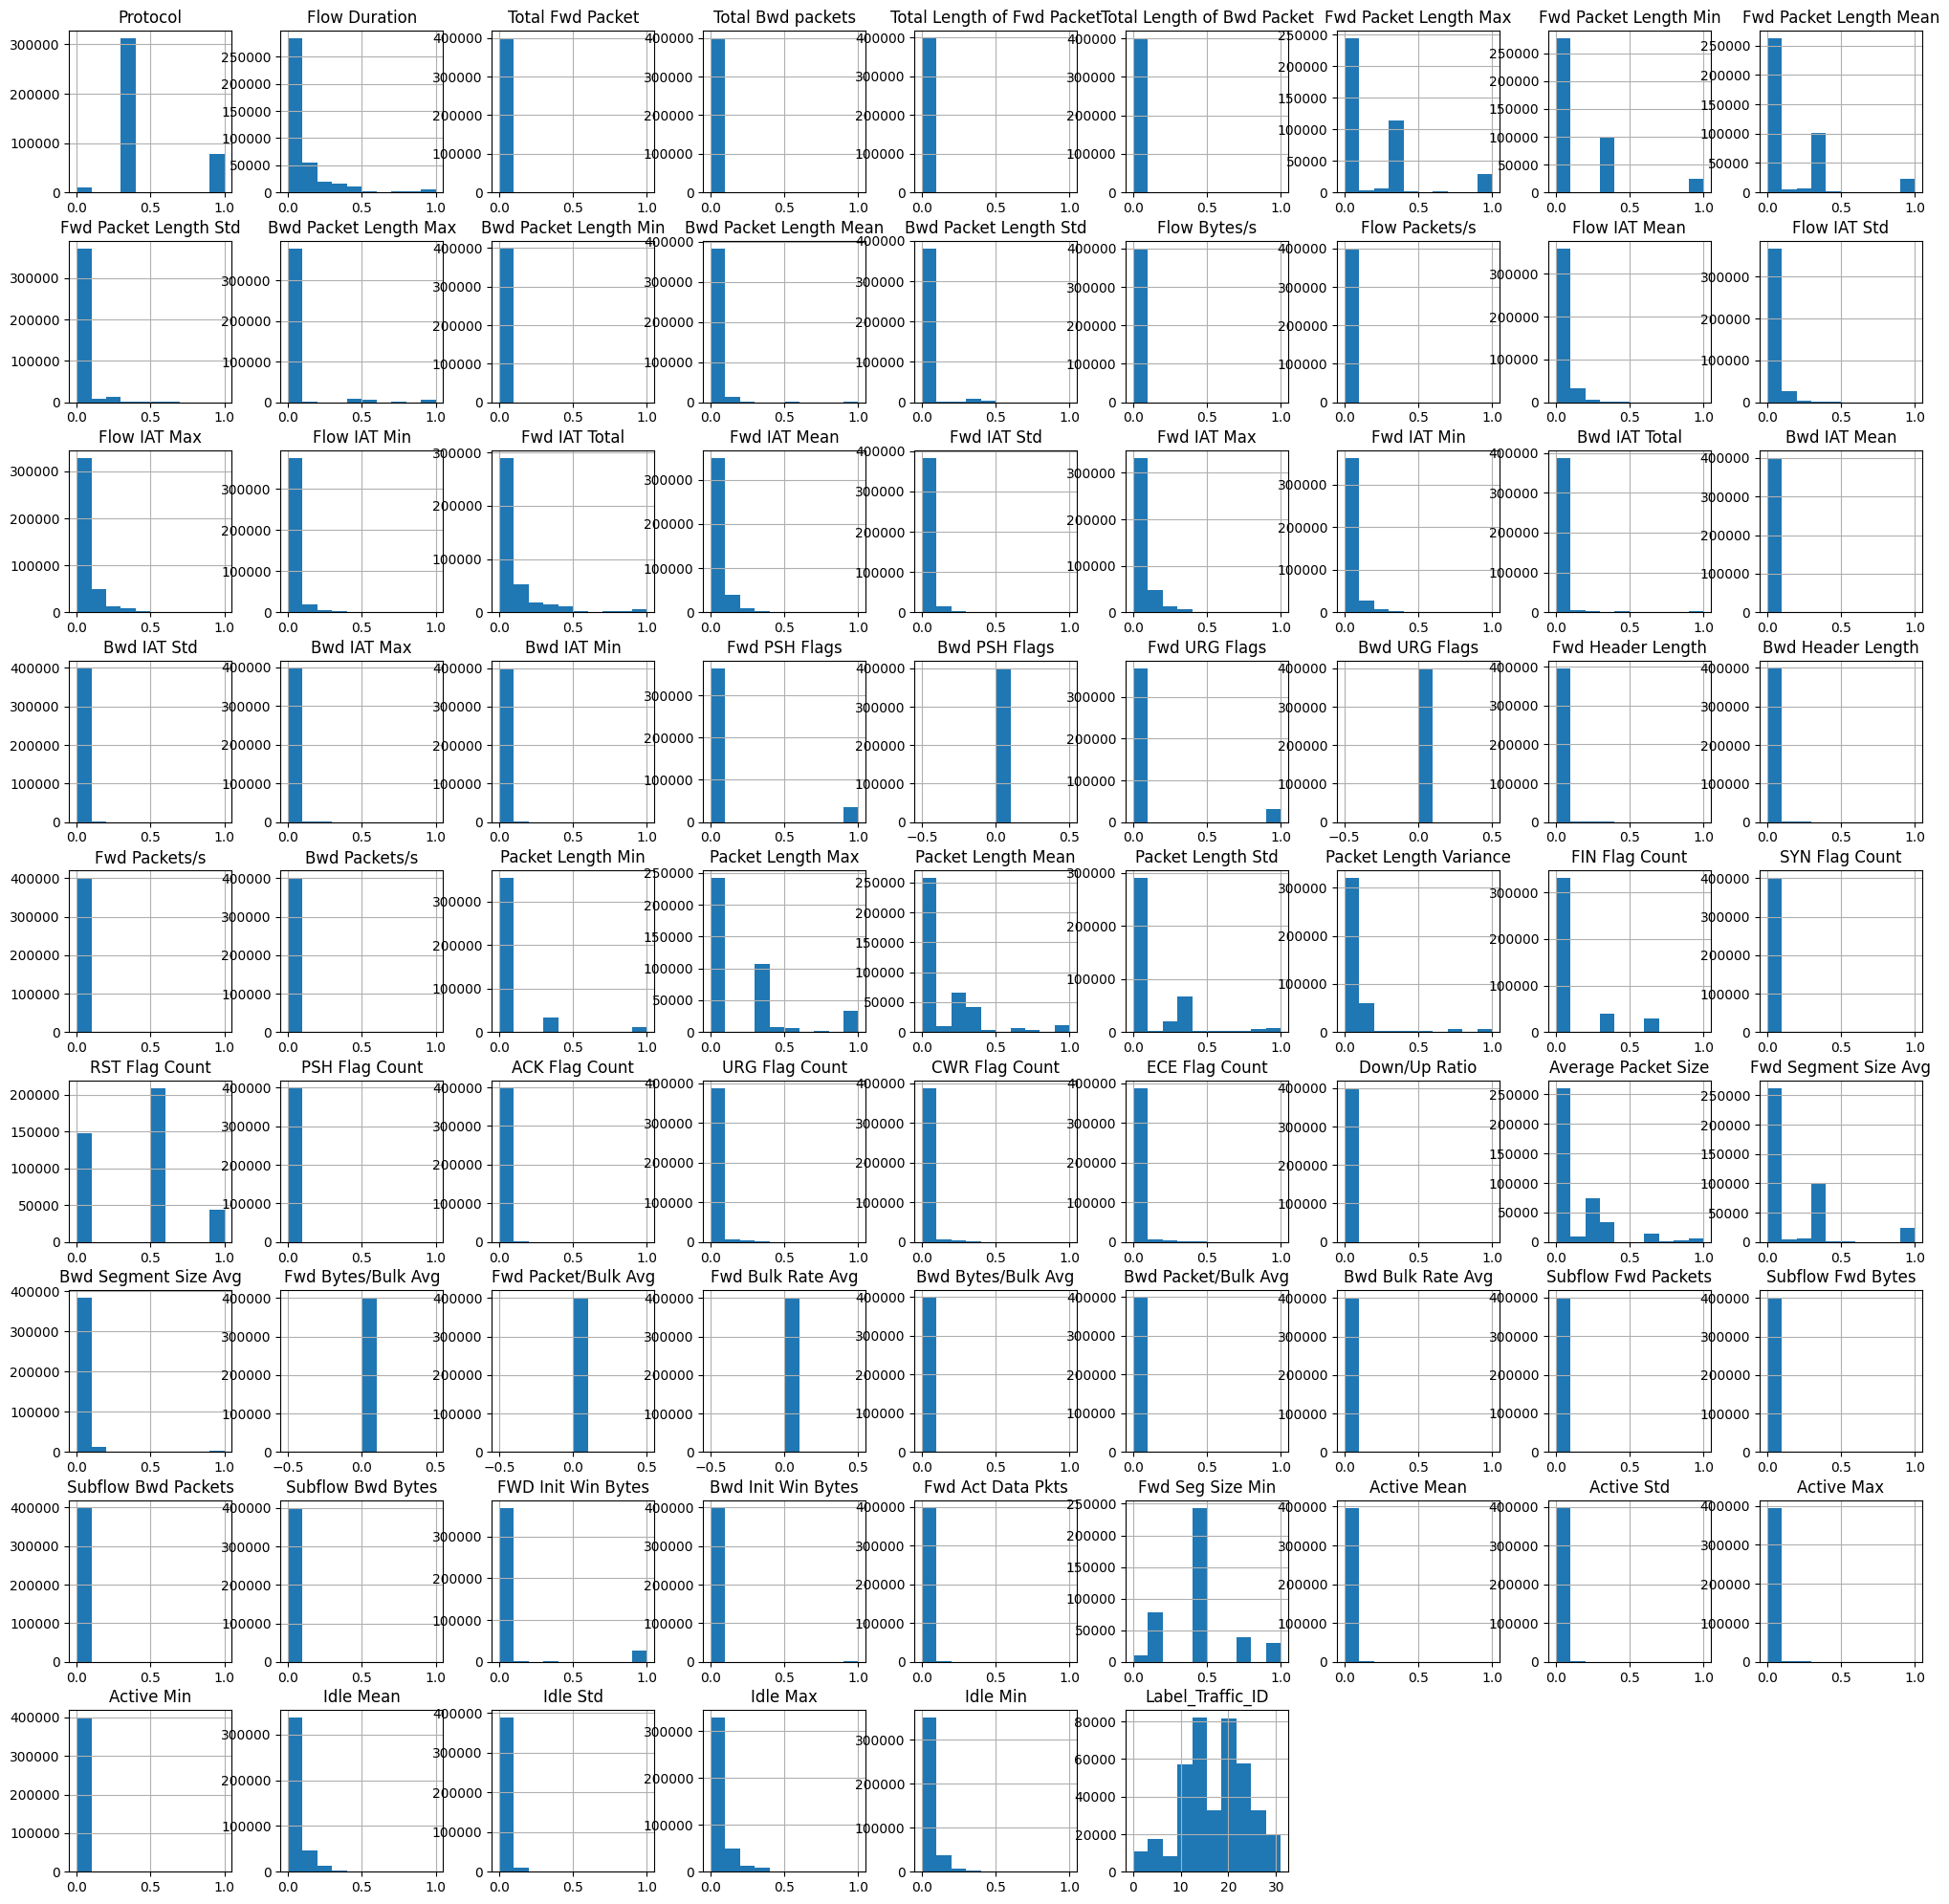

In [ ]:
#Distribution of Numerical Features:
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(figsize=(25, 25))
plt.show()

Correlation Heatmap:

In [ ]:
#Correlation Heatmap:
import pandas as pd

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Identify columns with absolute correlation above a threshold (e.g., 0.9)
threshold = 0.9
high_correlation_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature = correlation_matrix.columns[i]
            high_correlation_features.add(feature)

# Drop highly correlated features from the original numeric data
data_reduced = numeric_data.drop(columns=high_correlation_features)

print(f"Reduced dataset has {data_reduced.shape[1]} features out of {numeric_data.shape[1]} numeric features.")


Reduced dataset has 54 features out of 78 numeric features.


In [ ]:
print(data.columns)

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count',

In [ ]:
data.columns = data.columns.str.strip().str.lower()

In [ ]:
target_column = [col for col in data.columns if 'label' in col.lower()][0]
print(f"Using column: {target_column}")


Using column: label_traffic_id


###Target Distribution:



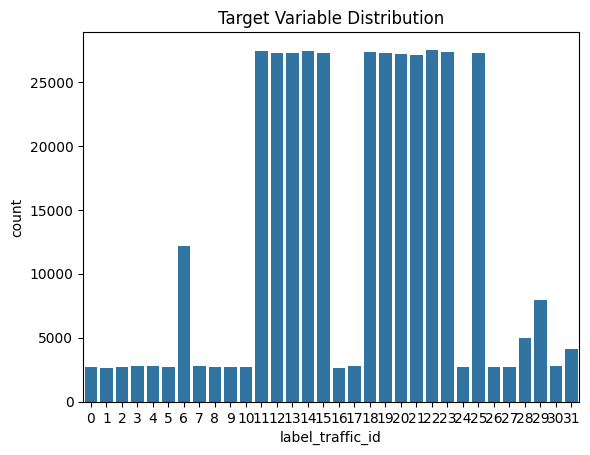

In [ ]:
sns.countplot(x=data[target_column])
plt.title("Target Variable Distribution")
plt.show()

##Step 3 : Preprocessing
In this step, we clean and prepare the dataset to ensure it is suitable for analysis and machine learning. Preprocessing is an essential phase that involves addressing missing data, normalizing features, and preparing the dataset for modeling.

###1.1 Handle Missing Data
If there are still missing values in the dataset:

In [ ]:
# Check for missing values
print(data.isnull().sum())

protocol                      0
flow duration                 0
total fwd packet              0
total bwd packets             0
total length of fwd packet    0
                             ..
idle mean                     0
idle std                      0
idle max                      0
idle min                      0
label_traffic_id              0
Length: 78, dtype: int64


###1.2 Encode Categorical Features
If categorical features exist (like Label_Traffic_ID), encode them:

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#Encode target or categorical features
#le = LabelEncoder()
#data['label_traffic_ID'] = le.fit_transform(data['Label_Traffic_ID'])  # Target column


###1.3 Feature Scaling
Scale numerical features to standardize the range:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = [col for col in data.columns if col != 'label_traffic_id']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


###1.4 Save the final result

In [ ]:
# Save the balanced dataset
data.to_csv('/content/drive/MyDrive/data/final_result.csv', index=False)
print("final result dataset saved as 'final_result.csv'")


final result dataset saved as 'final_result.csv'


##Step 4 : Trains and evaluates
In this step, we train and evaluate multiple machine learning models to identify the best-performing one. The process includes loading the dataset, preparing features and target variables, applying cross-validation, and selecting the most accurate model.

### Setup



In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import necessary modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Import specific classifiers and model saving tool
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import joblib

# Load and balance the dataset
data = pd.read_csv('/content/drive/MyDrive/data/final_result.csv')

# Balance dataset based on 'label_traffic_id'
#max_size = 100000
#unique_labels = data['label_traffic_id'].unique()
#balanced_data = pd.DataFrame()
#samples_per_class = max_size // len(unique_labels)

#for label in unique_labels:
#    class_data = data[data['label_traffic_id'] == label]
#    if len(class_data) > samples_per_class:
#        sampled_class_data = class_data.sample(n=samples_per_class, random_state=42)
#    else:
#        sampled_class_data = class_data
#    balanced_data = pd.concat([balanced_data, sampled_class_data], ignore_index=True)

#if len(balanced_data) > max_size:
#    balanced_data = balanced_data.sample(n=max_size, random_state=42)

# Prepare features and labels (assuming the target column is 'label_traffic_id')
X = data.drop('label_traffic_id', axis=1)
y = data['label_traffic_id']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dataset size: {X.shape[0]} records")
print(f"Training set: {X_train.shape[0]} records, Testing set: {X_test.shape[0]} records")


Dataset size: 400000 records
Training set: 280000 records, Testing set: 120000 records


### 1: Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', n_jobs=-1)
lr_model.fit(X_train, y_train)

# Predictions and evaluation
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_pred))

# Save the model
joblib.dump(lr_model, 'Logistic_Regression_model.joblib')
print("Logistic Regression model saved as 'Logistic_Regression_model.joblib'")


Logistic Regression Results:
Accuracy: 0.9483
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       864
           1       0.61      1.00      0.76       828
           2       0.99      0.73      0.84       810
           3       0.86      0.56      0.68       797
           4       0.96      0.59      0.73       829
           5       0.83      0.79      0.81       808
           6       1.00      1.00      1.00      3641
           7       0.99      0.99      0.99       820
           8       0.99      0.98      0.99       795
           9       0.89      0.98      0.93       810
          10       0.97      0.55      0.70       829
          11       0.95      0.97      0.96      8173
          12       1.00      1.00      1.00      8179
          13       1.00      1.00      1.00      8179
          14       0.97      1.00      0.98      8307
          15       0.88      0.90      0.89      8142
          16       1.00      1.00  

### 2: Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Results:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(classification_report(y_test, dt_pred))

# Save the model
joblib.dump(dt_model, 'Decision_Tree_model.joblib')
print("Decision Tree model saved as 'Decision_Tree_model.joblib'")


Decision Tree Results:
Accuracy: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       864
           1       1.00      1.00      1.00       828
           2       0.98      0.99      0.99       810
           3       0.99      0.93      0.96       797
           4       1.00      1.00      1.00       829
           5       1.00      1.00      1.00       808
           6       1.00      1.00      1.00      3641
           7       1.00      1.00      1.00       820
           8       1.00      1.00      1.00       795
           9       1.00      1.00      1.00       810
          10       0.98      0.97      0.98       829
          11       0.99      0.99      0.99      8173
          12       1.00      1.00      1.00      8179
          13       1.00      1.00      1.00      8179
          14       0.99      1.00      0.99      8307
          15       0.97      0.99      0.98      8142
          16       1.00      1.00      1.

### 3: Random Forest

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, rf_pred))

# Save the model
joblib.dump(rf_model, 'Random_Forest_model.joblib')
print("Random Forest model saved as 'Random_Forest_model.joblib'")


Random Forest Results:
Accuracy: 0.9949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       864
           1       1.00      1.00      1.00       828
           2       1.00      0.99      0.99       810
           3       0.99      0.93      0.96       797
           4       1.00      1.00      1.00       829
           5       1.00      1.00      1.00       808
           6       1.00      1.00      1.00      3641
           7       1.00      1.00      1.00       820
           8       1.00      1.00      1.00       795
           9       1.00      1.00      1.00       810
          10       0.98      0.96      0.97       829
          11       0.99      0.99      0.99      8173
          12       1.00      1.00      1.00      8179
          13       1.00      1.00      1.00      8179
          14       0.99      1.00      0.99      8307
          15       0.97      0.99      0.98      8142
          16       1.00      1.00      1.

### 4: Gradient Boosting

In [ ]:
# Gradient Boosting with 50 estimators
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Results:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(classification_report(y_test, gb_pred))

# Save the model
joblib.dump(gb_model, 'Gradient_Boosting_model.joblib')
print("Gradient Boosting model saved as 'Gradient_Boosting_model.joblib'")


Gradient Boosting Results:
Accuracy: 0.9916
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       864
           1       1.00      1.00      1.00       828
           2       0.99      0.94      0.96       810
           3       0.96      0.89      0.93       797
           4       1.00      1.00      1.00       829
           5       1.00      1.00      1.00       808
           6       1.00      1.00      1.00      3641
           7       1.00      0.99      1.00       820
           8       1.00      1.00      1.00       795
           9       0.99      0.99      0.99       810
          10       0.99      0.93      0.96       829
          11       0.99      0.99      0.99      8173
          12       1.00      1.00      1.00      8179
          13       1.00      1.00      1.00      8179
          14       0.99      1.00      0.99      8307
          15       0.95      0.99      0.97      8142
          16       1.00      1.00    

### 5: K-Nearest Neighbors (KNN)

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(X_train, y_train)

# Predictions and evaluation
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, knn_pred))

# Save the model
joblib.dump(knn_model, 'KNN_model.joblib')
print("KNN model saved as 'KNN_model.joblib'")


K-Nearest Neighbors Results:
Accuracy: 0.9880
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       864
           1       1.00      1.00      1.00       828
           2       0.98      0.99      0.99       810
           3       0.96      0.92      0.94       797
           4       1.00      0.99      1.00       829
           5       0.99      1.00      1.00       808
           6       1.00      1.00      1.00      3641
           7       1.00      0.99      1.00       820
           8       0.99      1.00      1.00       795
           9       0.96      0.96      0.96       810
          10       0.97      0.93      0.95       829
          11       0.98      0.99      0.99      8173
          12       1.00      1.00      1.00      8179
          13       1.00      1.00      1.00      8179
          14       1.00      0.99      1.00      8307
          15       0.96      0.98      0.97      8142
          16       1.00      1.00  

### 6: Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine
svm_model = SVC(gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Results:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, svm_pred))

# Save the model
joblib.dump(svm_model, 'SVM_model.joblib')
print("SVM model saved as 'SVM_model.joblib'")


SVM Results:
Accuracy: 0.9523
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       864
           1       0.60      1.00      0.75       828
           2       1.00      0.76      0.86       810
           3       0.86      0.73      0.79       797
           4       0.99      0.41      0.58       829
           5       0.70      0.79      0.74       808
           6       1.00      1.00      1.00      3641
           7       0.99      0.99      0.99       820
           8       1.00      0.99      0.99       795
           9       0.88      0.97      0.93       810
          10       1.00      0.55      0.71       829
          11       0.93      0.97      0.95      8173
          12       1.00      1.00      1.00      8179
          13       1.00      1.00      1.00      8179
          14       0.97      1.00      0.99      8307
          15       0.85      0.93      0.89      8142
          16       1.00      1.00      1.00       7

### 7: XGBoost

In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(classification_report(y_test, xgb_pred))

# Save the model
joblib.dump(xgb_model, 'XGBoost_model.joblib')
print("XGBoost model saved as 'XGBoost_model.joblib'")


XGBoost Results:
Accuracy: 0.9947
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       864
           1       1.00      1.00      1.00       828
           2       0.99      0.98      0.98       810
           3       0.98      0.92      0.95       797
           4       1.00      1.00      1.00       829
           5       1.00      1.00      1.00       808
           6       1.00      1.00      1.00      3641
           7       1.00      1.00      1.00       820
           8       1.00      1.00      1.00       795
           9       1.00      1.00      1.00       810
          10       1.00      0.95      0.98       829
          11       0.99      0.99      0.99      8173
          12       1.00      1.00      1.00      8179
          13       1.00      1.00      1.00      8179
          14       1.00      0.99      1.00      8307
          15       0.97      1.00      0.98      8142
          16       1.00      1.00      1.00    